<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_02_01_Linear_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-D harmonic (linear) oscillator with viscous friction

## Basic Physics

A 1-D harmonic oscillator with viscous friction can be described by the following second-order differential equation:

$ m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0 $

Where:
- $ m $: mass of the object
- $ c $: damping coefficient (viscous friction)
- $ k $: spring constant
- $ x $: displacement from the equilibrium position
- $ t $: time

The equation represents the balance of three forces:
1. **Inertial Force**: $ m\frac{d^2 x}{dt^2} $ - the force due to the mass's acceleration.
2. **Damping Force**: $ c\frac{dx}{dt} $ - the force due to viscous friction, proportional to the velocity.
3. **Restoring Force**: $ kx $ - the force exerted by the spring, proportional to the displacement from equilibrium.

## Solution

The solution to this differential equation depends on the relative values of $ m $, $ c $, and $ k $. The system can be:
- **Underdamped**: Oscillates with decreasing amplitude.
- **Critically damped**: Returns to equilibrium as quickly as possible without oscillating.
- **Overdamped**: Returns to equilibrium without oscillating but more slowly than the critically damped case.

## Example

Consider a mass-spring-damper system with:
- Mass $ m = 1 \, \text{kg} $
- Damping coefficient $ c = 0.5 \, \text{kg/s} $
- Spring constant $ k = 4 \, \text{N/m} $

The differential equation becomes:

$ \frac{d^2 x}{dt^2} + 0.5\frac{dx}{dt} + 4x = 0 $

To solve this, you can use the characteristic equation:

$ r^2 + 0.5r + 4 = 0 $

Solving for $ r $, you'll find the roots, which will help you determine the general solution for $ x(t) $, depending on whether the system is underdamped, critically damped, or overdamped.

## Conclusion

The 1-D harmonic oscillator with viscous friction is a fundamental model in physics, describing many real-world systems. By understanding the forces involved and solving the corresponding differential equation, you can predict the system's behavior over time.


## Solving the solution using sympy

In [28]:
import sympy as sp

# Define the symbols
m, c, k, t = sp.symbols('m c k t')
x = sp.Function('x')

# Define the differential equation
deqn = sp.Eq(m * x(t).diff(t, t) + c * x(t).diff(t) + k * x(t), 0)

# Solve the differential equation
sol = sp.dsolve(deqn, x(t))

# Print the solution
sol

Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

In [21]:
print(sol)

Eq(x(t), C1*exp(t*(-k + sqrt(k**2 - 4*w**2))/2) + C2*exp(-t*(k + sqrt(k**2 - 4*w**2))/2))


## Determining the constants C1 and C2

In [29]:
# Define the initial conditions
x0 = sp.symbols('x0')  # Initial displacement
v0 = sp.symbols('v0')  # Initial velocity

# Apply the initial conditions to the solution
constants = sp.solve([sol.rhs.subs(t, 0) - x0, sol.rhs.diff(t).subs(t, 0) - v0], sol.free_symbols)

In [30]:
# Print the constants
constants

[{C1: (c*x0 + 2*m*v0 + x0*sqrt(c**2 - 4*k*m))/(2*sqrt(c**2 - 4*k*m)),
  C2: (-c*x0 - 2*m*v0 + x0*sqrt(c**2 - 4*k*m))/(2*sqrt(c**2 - 4*k*m))}]

## The use of the constants C1 and C2

The constants $ C_1 $ and $ C_2 $ appear in the general solution of the second-order linear homogeneous differential equation

$ m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0 $

When you solve this differential equation, you'll obtain a general solution that contains two arbitrary constants, $ C_1 $ and $ C_2 $. These constants are placeholders that can be determined by applying specific initial conditions or other constraints to the system.

Here's a general outline of how the solution might look for the three different damping cases:

1. **Underdamped** ($ c^2 < 4mk $): The solution will be of the form

   $ x(t) = e^{-\frac{c}{2m}t} \left( C_1 \cos \omega_d t + C_2 \sin \omega_d t \right) $

   where $ \omega_d = \sqrt{\frac{k}{m} - \left(\frac{c}{2m}\right)^2} $ is the damped natural frequency.

2. **Critically Damped** ($ c^2 = 4mk $): The solution will be of the form

   $ x(t) = (C_1 + C_2 t) e^{-\frac{c}{2m}t} $

3. **Overdamped** ($ c^2 > 4mk $): The solution will be of the form

   $ x(t) = C_1 e^{r_1 t} + C_2 e^{r_2 t} $

   where $ r_1 $ and $ r_2 $ are the roots of the characteristic equation.

The constants $ C_1 $ and $ C_2 $ can be determined by applying the initial conditions, such as the initial displacement and initial velocity. Once you have the values of these constants, you'll have the particular solution that describes the motion of the system for the given initial conditions.

## Plot the phase-space portrait [x(t), v(t)] for ω0 = 0.8 and several values of v(0)

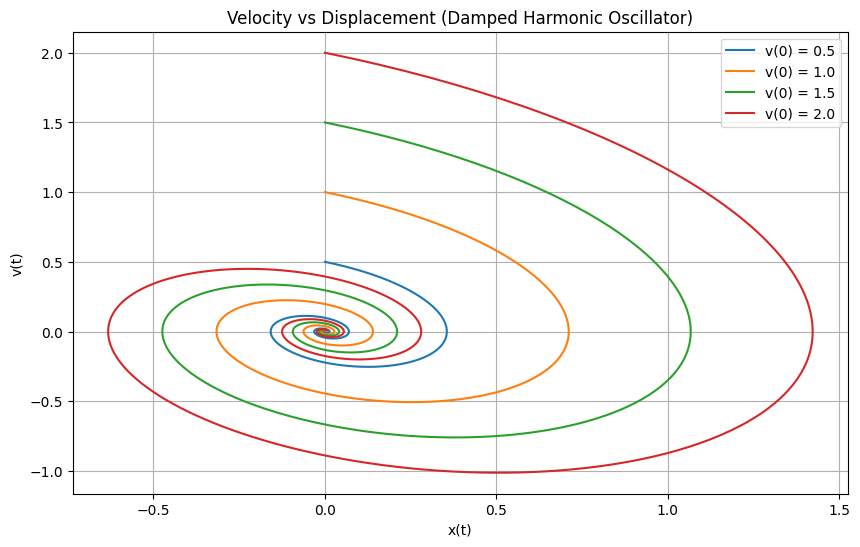

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Parameters
m = 1
c = 0.5
k = 1
x0 = 0.0

# Symbols
t = sp.Symbol('t')
C1, C2 = sp.symbols('C1 C2')
v0 = sp.Symbol('v0')  # Initial velocity

# Differential equation for damped harmonic oscillator
x = sp.Function('x')
deqn = sp.Eq(m * x(t).diff(t, t) + c * x(t).diff(t) + k * x(t), 0)

# Solve the differential equation
sol = sp.dsolve(deqn, x(t))

# Constants from initial conditions
constants = sp.solve([sol.rhs.subs(t, 0) - x0, sol.rhs.diff(t).subs(t, 0) - v0], [C1, C2])

# Substitute the constants into the solution
x_t = sol.rhs.subs(constants)

# Initial values of v(0)
v0_values = [0.5, 1.0, 1.5, 2.0]

# Plot v(t) against x(t) for different values of v(0)
plt.figure(figsize=(10, 6))
for v in v0_values:
    x_t_sub = x_t.subs(v0, v)
    v_t = x_t_sub.diff(t)
    t_values = np.linspace(0, 20, 1000)
    x_values = [x_t_sub.evalf(subs={t: ti}) for ti in t_values]
    v_values = [v_t.evalf(subs={t: ti}) for ti in t_values]
    plt.plot(x_values, v_values, label=f'v(0) = {v}')

plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.legend()
plt.title('Velocity vs Displacement (Damped Harmonic Oscillator)')
plt.grid(True)
plt.show()


## Numerically solving the problem

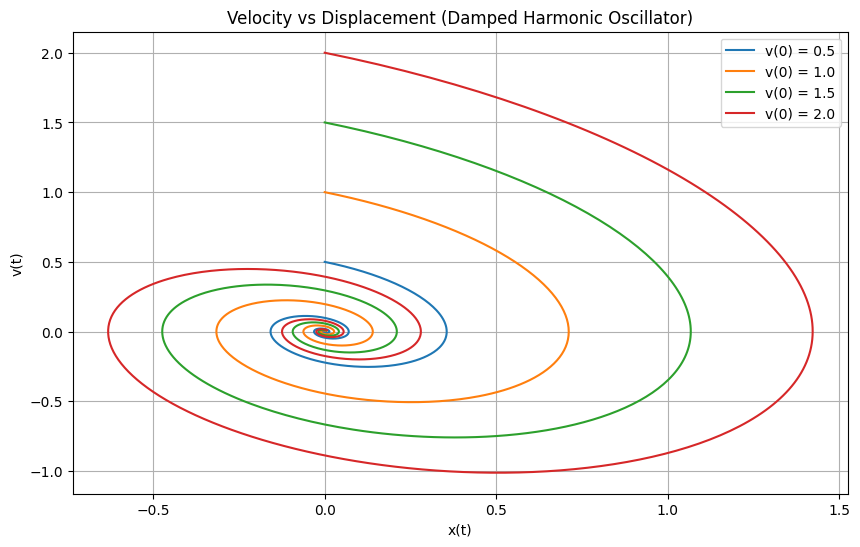

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 1
c = 0.5
k = 1
x0 = 0.0

# Initial values of v(0)
v0_values = [0.5, 1.0, 1.5, 2.0]

# Define the system of first-order differential equations
def system(t, y, c, k, m):
    x, v = y
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# Plot v(t) against x(t) for different values of v(0)
plt.figure(figsize=(10, 6))
for v0 in v0_values:
    # Solve the system of differential equations using solve_ivp
    sol = solve_ivp(system, [0, 20], [x0, v0], args=(c, k, m), t_eval=np.linspace(0, 20, 1000))

    # Plot the solution
    plt.plot(sol.y[0], sol.y[1], label=f'v(0) = {v0}')

plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.legend()
plt.title('Velocity vs Displacement (Damped Harmonic Oscillator)')
plt.grid(True)
plt.show()
